In [14]:
import sys
!{sys.executable} -m pip install pythainlp
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install multidict

In [15]:
from pythainlp import sent_tokenize, word_tokenize
import multidict as multidict
import re
import pythainlp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [16]:
text = """
เรียนพี่น้องประชาชนที่รักทุกท่าน

ในวันนี้ (5 พ.ค. 64) ได้มีการประชุมคณะรัฐมนตรี ซึ่งวาระการประชุมที่สำคัญก็คือ การช่วยเหลือพี่น้องประชาชนจำนวนมากที่ได้รับผลกระทบอย่างหลีกเลี่ยงไม่ได้จากการปิดสถานที่ตามมาตรการการป้องกันและควบคุมการแพร่ระบาด ซึ่งก่อนหน้าการประชุมคณะรัฐมนตรีในวันนี้ ผมได้มีคำสั่งให้กับทางกระทรวงการคลัง และสภาพัฒนาเศรษฐกิจและสังคมแห่งชาติ ให้ไปพิจารณาออกมาตรการช่วยเหลือเยียวยาพี่น้องประชาชนเพิ่มเติมโดยเร่งด่วน ซึ่งสรุปได้เป็นมาตรการที่ได้นำเสนอต่อให้คณะรัฐมนตรีพิจารณาในวันนี้ดังต่อไปนี้
มาตรการระยะที่ 1 : มี 3 มาตรการหลัก ที่สามารถดำเนินการได้ทันที ได้แก่

1. มาตรการด้านการเงิน มีสองมาตรการคือ
1.1 มาตรการสินเชื่อสู้ภัย COVID-19 วงเงินรวม 20,000 ล้านบาท เพื่อเพิ่มสภาพคล่องให้ ทั้งประชาชน ผู้ประกอบการ และเกษตรกร โดยธนาคารออมสินและธนาคารเพื่อการเกษตรและสหกรณ์การเกษตร ให้สินเชื่อแก่ประชาชนรายละ 10,000 บาท ด้วยหลักเกณฑ์ที่ผ่อนปรนกว่าสินเชื่อปกติ ดอกเบี้ย 0.35% ต่อเดือน เป็นระยะเวลา 3 ปี ปลอดชำระทั้งเงินต้นและดอกเบี้ยใน 6 เดือนแรก
1.2 มาตรการพักชำระหนี้ของสถาบันการเงินเฉพาะกิจหรือ SFIs โดยให้ SFIs ขยายระยะเวลาพักชำระเงินต้นให้แก่ลูกหนี้ ออกไปจนถึงสิ้นปีนี้ เพื่อลดภาระ และสามารถนำเงินที่จะต้องชำระหนี้ไปเป็นเสริมสภาพคล่อง ซึ่งจะจากผลกระทบที่เกิดขึ้น เพื่อดูแลลูกหนี้ได้อย่างเหมาะสม

2. มาตรการด้านการบรรเทาภาระค่าใช้จ่าย โดยภาครัฐจะลดค่าใช้จ่ายค่าไฟฟ้า และน้ำประปาของประชาชน และกิจการขนาดเล็กทั่วประเทศ ในช่วงเดือนพฤษภาคม - มิถุนายน 2564 เพื่อเป็นการลดภาระค่าใช้จ่ายของประชาชนและกิจการที่ถูกปิด

3. มาตรการต่อเนื่องด้านการช่วยเหลือเยียวยาประชาชน ประกอบด้วย 2 โครงการ วงเงินรวมประมาณ 85,500 ล้านบาท ได้แก่
3.1 การเพิ่มวงเงินโครงการเราชนะ อีกสัปดาห์ละ 1,000 บาท เป็นระยะเวลา 2 สัปดาห์ โดยให้สิ้นสุดเวลาการใช้จ่ายในเดือนมิถุนายน 2564 วงเงินรวมประมาณ 67,000 ล้านบาท
3.2 การเพิ่มเงินช่วยเหลือผู้ประกันตนโครงการ ม.33 เรารักกัน อีกสัปดาห์ละ 1,000 บาท เป็นระยะเวลา 2 สัปดาห์ โดยให้สิ้นสุดเวลาการใช้จ่ายในเดือนมิถุนายน 2564 วงเงินรวมประมาณ 18,500 ล้านบาท

ในส่วนของมาตรการระยะที่ 1 นั้น ในวันนี้คณะรัฐมนตรีได้มีมติเห็นชอบให้ดำเนินการในส่วนของมาตรการด้านการเงินทั้ง 2 เรื่องตามที่กระทรวงการคลังเสนอ และเห็นชอบให้ดำเนินมาตรการลดค่าใช้จ่ายน้ำประปา และไฟฟ้า ในช่วงเดือนพฤษภาคม - มิถุนายน แล้วครับ

สำหรับการเพิ่มเงินในโครงการเราชนะ และโครงการ ม.33 เรารักกัน หน่วยงานที่รับผิดชอบโครงการจะเร่งนำเสนอโครงการให้พิจารณาตามขั้นตอน ซึ่งผมได้กำหนดให้นำเข้าสู่การพิจารณาของคณะรัฐมนตรีในสัปดาห์หน้าต่อไป

นอกจากนี้ยังจะมีมาตรการต่อเนื่องอื่นๆอีก เช่นการช่วยเหลือลูกหนี้กยศ. โดยการขยายระยะเวลามาตรการช่วยเหลือผู้กู้ยืมสู้ภัยโควิดออกไปจนสิ้นปีนี้ และลดอัตราดอกเบี้ยเหลือร้อยละ 0.01 ซึ่งจะมีผู้ได้รับประโยชน์จากมาตรการนี้ประมาณ 3 ล้านคน รวมทั้งการชดเชยผู้ประกันตนตาม ม.33 ที่ต้องกักตัวหรือต้องหยุดทำงาน

นอกจากโครงการระยะสั้นแล้ว ทางรัฐบาลยังได้วางแผนช่วยเหลือพี่น้องประชาชนอย่างต่อเนื่องไปอีกถึงอย่างน้อยสิ้นปีนี้ ด้วย มาตรการระยะที่ 2 : ในช่วงเดือนกรกฎาคม - ธันวาคม 2564 ซึ่งคาดว่าถ้าเราร่วมมือกันเพื่อจำกัดการระบาดอย่างเต็มที่ สถานการณ์การระบาดน่าจะคลี่คลายลงจนอยู่ในระดับที่สามารถดำเนินมาตรการในระยะที่ 2 ได้ โดยมาตรการในระยะที่ 2 ประกอบด้วย 2 มาตรการหลัก กรอบวงเงินประมาณ 140,000 ล้านบาท ได้แก่

1. มาตรการลดภาระค่าครองชีพ ประกอบด้วย 2 โครงการ ได้แก่
1.1โครงการเพิ่มกำลังซื้อให้แก่ผู้มีบัตรสวัสดิการแห่งรัฐ ระยะที่ 3 โดยให้ความช่วยเหลือเพิ่มเติมเดือนละ 200 บาท ระยะเวลา 6 เดือน ตั้งแต่กรกฎาคม - ธันวาคม 2564 ครอบคลุมประชาชนประมาณ 13 ล้าน 6 แสนคน
1.2 โครงการเพิ่มกำลังซื้อให้แก่ผู้ที่ต้องการความช่วยเหลือเป็นพิเศษ โดยให้ความช่วยเหลือเพิ่มเติมเดือนละ 200 บาท ระยะเวลา 6 เดือน ตั้งแต่กรกฎาคม - ธันวาคม 2564 ครอบคลุมประชาชนประมาณ 2 ล้าน 5 แสนคน

2. มาตรการฟื้นฟูเศรษฐกิจ โดยการกระตุ้นกำลังซื้อของประชาชนกลุ่มที่มีรายได้ปานกลาง และรายได้สูง ประกอบด้วย 2 โครงการ ได้แก่
2.1 โครงการคนละครึ่ง ระยะที่ 3 : ซึ่งโครงการนี้ทุกท่านคงมีความคุ้นเคยอยู่แล้ว และเป็นโครงการที่ประสบความสำเร็จเป็นอย่างมาก และก่อให้เกิดการกระตุ้นเศรษฐกิจ และช่วยเหลือเศรษฐกิจฐานรากได้โดยตรง
2.2 โครงการ “ยิ่งใช้ยิ่งได้” : โครงการนี้จะเป็นโครงการใหม่ ซึ่งโดยภาครัฐจะสนับสนุนบัตรกำนัลอิเล็กทรอนิกส์ (e-Voucher) ให้แก่ผู้ที่ได้รับสิทธิโครงการยิ่งใช้ยิ่งได้ เมื่อชำระเงินผ่าน g-Wallet บนแอปพลิเคชัน “เป๋าตัง” กับผู้ประกอบการร้านค้าและบริการที่จดทะเบียนภาษีมูลค่าเพิ่มซึ่งติดตั้งแอปพลิเคชัน “ถุงเงิน” ที่เข้าร่วมโครงการยิ่งใช้ยิ่งได้ ซึ่งโครงการนี้จะช่วยกระตุ้นการบริโภคในประเทศผ่านผู้มีกำลังซื้อสูงให้นำเงินออกมาใช้จ่ายและสนับสนุนผู้ประกอบการที่อยู่ในระบบภาษีมูลค่าเพิ่ม

โดยมาตรการในระยะที่ 2 ทั้งสี่โครงการข้างต้นจะครอบคลุมกลุ่มเป้าหมายกว่า 51 ล้านคน และคาดว่าจะมีเม็ดเงินเข้าสู่ระบบเศรษฐกิจประมาณ 473,000 ล้านบาท ซึ่งจะช่วยให้ผู้ประกอบการ SME ที่จดทะเบียนภาษีมูลค่าเพิ่ม สามารถมีโอกาสในการขายสินค้า และบริการได้มากขึ้น
ซึ่งมาตรการในระยะที่ 2 นี้ ครม.ได้รับทราบในหลักการ และหน่วยงานที่รับผิดชอบจะเร่งดำเนินการเพื่อขออนุมัติจาก ครม. ต่อไป

และทั้งหมดนี้ คือการดำเนินการอย่างเต็มที่ของรัฐบาล ในการช่วยเหลือพี่น้องประชาชนที่ได้รับผลกระทบทางเศรษฐกิจ ผมในฐานะนายกรัฐมนตรี จะไม่มีวันท้อถอยหรือท้อแท้ ไม่ว่าจะต้องเผชิญกับปัญหาใดๆ และจะไม่หยุดในการคิดและทำเพื่อช่วยเหลือแก้ปัญหาให้กับพี่น้องประชาชนทุกคน เพื่ออนาคตของประเทศไทยหลังโควิดที่มั่นคงและแข็งแรงครับ
"""

In [17]:
tokens = word_tokenize(text, keep_whitespace=False)

In [18]:
keywords = multidict.MultiDict()
tmpdict = {}

for text in tokens:
    if(text in pythainlp.corpus.common.thai_stopwords() or re.match('[0-9]+|\-|\.',text)):
        continue
    val = tmpdict.get(text, 0)
    tmpdict[text.lower()] = val + 1
for key in tmpdict:
    keywords.add(key, tmpdict[key])

In [19]:
prayuth_mask = np.array(Image.open('./images/20210505-mask.png'))

wordcloud = WordCloud(font_path='BaiJamjuree-Regular.woff',
                      background_color="white",
                      width=4096,
                      height=2160,
                      max_words=100,
                      collocations=False,
                      stopwords=list(pythainlp.corpus.common.thai_stopwords()),
                      mask=prayuth_mask)

wordcloud.generate_from_frequencies(keywords)

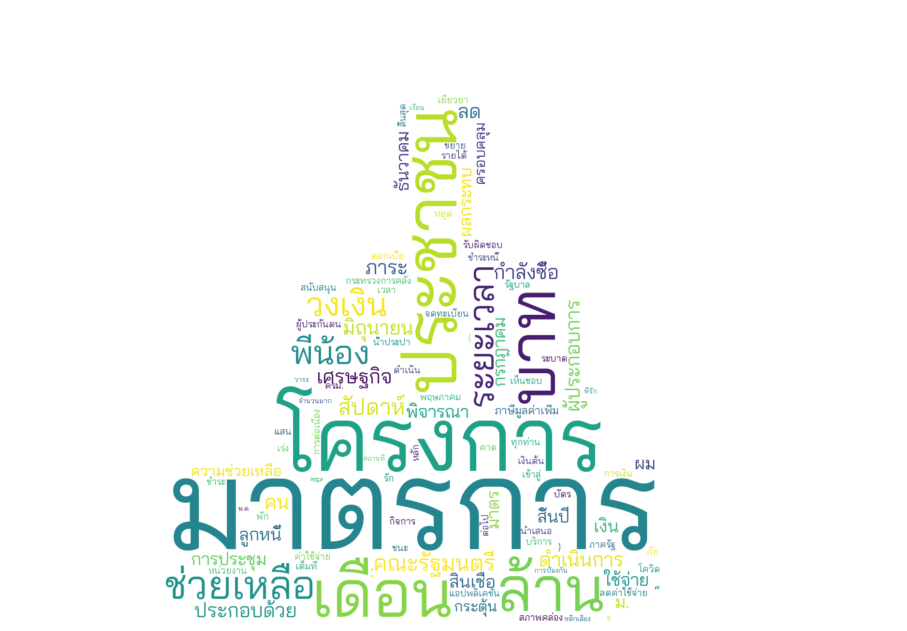

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.savefig('./images/20210505-output.png')